In [ ]:
import pandas as pd

# descarga de archivo
url_amz="https://raw.githubusercontent.com/NechuBM/dataset/main/precios_amazon.csv"
!wget {url_amz} -q -O precios_amazon.csv
url_eth="https://raw.githubusercontent.com/NechuBM/dataset/main/precios_ethereum.csv"
!wget {url_eth} -q -O precios_ethereum.csv
# fecha de inicio: 2021-02-01
# fecha final: 2022-04-01

In [ ]:
#Leemos el archivo de precios de Amazon
#Indicamos que se separen los elementos por ;
#Indicamos que los decimales están separados por ,
#Guardamos el data frame en una variable df_amazon

df_amazon = pd.read_csv('precios_amazon.csv', sep = ";", decimal = ",")

#Repetimos lo mismo con ethereum

df_ethereum = pd.read_csv('precios_ethereum.csv', sep = ";", decimal = ",")

In [ ]:
#Para ver las 5 primeras filas; si especificamos (8), van a ser los 8 primeros

df_ethereum.head()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,2021-01-31,1376.823608,1378.916016,1288.501587,1314.986206,1314.986206,25198853581
1,1,1,2021-02-01,1314.855225,1373.845825,1274.357788,1369.040527,1369.040527,29210670920
2,2,2,2021-02-02,1369.505127,1542.990967,1362.771240,1515.193726,1515.193726,45437142801
3,3,3,2021-02-03,1514.769653,1660.909546,1510.010254,1660.909546,1660.909546,41874566399
4,4,4,2021-02-04,1661.170166,1689.186646,1561.853516,1594.762695,1594.762695,44396871836


In [ ]:
#Para saber la cantidad de datos que hay en un data frame
len(df_amazon)

295

In [ ]:
len(df_ethereum)

425

Ethereum es superior al n° de Amazon, porque Amazon es una accion que cotiza en bolsa y por lo tanto los feriados y fines de semana, no hay precio de apertura y serie; por otro lado Ethereum es una cryptomoneda y es un mercado continuo

In [ ]:
#Vamos a utilizar una función para descartar los dias de fines de semana de Ethereum
def descartar_dias(df, days):
    """ Descartar elementos del DataFrame si vienen incluidos en la lista days"""
    # crear copia para no afectar al original
    df_discard = df.copy()
    # reiniciar el índice
    df_discard.reset_index(inplace=True)
    # modificar el formato de los datos de la columna 'Date' a datetime
    df_discard['Date'] = pd.to_datetime(df_discard['Date'])
    # crear una nueva columna con los días de la semana a partir de la columna 'Date'
    df_discard['Day'] = df_discard['Date'].dt.day_name()
    # descartar días que esten en la lista 'days'
    df_discard = df_discard.loc[~df_discard['Day'].isin(days)]
    return df_discard


In [ ]:
#La usamos con el dataframe de Ethereum
df_ethereum_week = descartar_dias(df_ethereum, ['Saturday', 'Sunday'])

In [ ]:
df_ethereum_week.head()

,index,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Day
1,1,1,1,2021-02-01,1314.855225,1373.845825,1274.357788,1369.040527,1369.040527,29210670920,Monday
2,2,2,2,2021-02-02,1369.505127,1542.990967,1362.771240,1515.193726,1515.193726,45437142801,Tuesday
3,3,3,3,2021-02-03,1514.769653,1660.909546,1510.010254,1660.909546,1660.909546,41874566399,Wednesday
4,4,4,4,2021-02-04,1661.170166,1689.186646,1561.853516,1594.762695,1594.762695,44396871836,Thursday
5,5,5,5,2021-02-05,1594.793335,1756.510986,1594.793335,1718.650879,1718.650879,40108628454,Friday


In [ ]:
#Ahora vemos cuantos elementos tenemos
len(df_ethereum_week)

304

In [ ]:
df_amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2021,3242.360107,3350.26001,3235.030029,3342.879883,3342.879883,4160200
1,2/2/2021,3380.000000,3427.73999,3361.129883,3380.000000,3380.000000,7098600
2,3/2/2021,3425.010010,3434.00000,3308.620117,3312.530029,3312.530029,7088800
3,4/2/2021,3330.000000,3347.00000,3277.750000,3331.000000,3331.000000,3670700
4,5/2/2021,3319.000000,3377.00000,3302.709961,3352.149902,3352.149902,3620800


In [ ]:
#Ahora vamos a buscar obtener un listado de los precios. Vamos a quedarnos solamente con el precio de cierre
#Ponemos la columna que queremos obtener y la transformamos a lista con el metodo .ToList
precios_amazon = df_amazon['Close'].tolist()
precios_ethereum = df_ethereum_week['Close'].tolist()

# Medidas de Tendencia Central

## Media



In [ ]:
#Creamos una función para calcular la media
def calcular_media (lista):
  #Primero sacamos la cantidad de elementos
  cant_elementos = len(lista)

  #Segundo sacamos la media, utilizando sum para sumar todos los valores y los dividimos por cant_elementos
  media = sum(lista)  / cant_elementos
  return media

In [ ]:


#Calculamos la Media de Amazon
media_amazon = calcular_media(precios_amazon)

#Hacemos lo mismo con ethereum
media_ethereum = calcular_media(precios_ethereum)

In [ ]:
#Usamos printf porque si en algún momento cambias las medias, se van a printear esos cambios
print(f"Precio medio de Amazon: {media_amazon}")
print(f"Precio medio de Ethereum: {media_ethereum}")

Precio medio de Amazon: 3299.830895766101
Precio medio de Ethereum: 2927.1955982409027


##Moda

In [ ]:
def calcular_moda (lista):
  #Lo primero que tenemos que hacer es redondear los valores, porque es dificil que dos números decimales se repitan
  lista_redondeada = []
  for precio in lista:
    lista_redondeada.append(round(precio))

  #Ahora vamos a crear un diccionario para ver cual es el precio que más se repite
  contador = {}
  for elemento in lista_redondeada:
    if elemento in contador:
      contador[elemento] += 1
    else:
      contador[elemento] = 1

  #Ahora vamos a buscar el elemento que más se repite, directamente lo voy a intentar aplicar en una función
  moda = max(contador, key = contador.get)

  return moda


In [ ]:
moda_amz = calcular_moda(precios_amazon)
moda_eth = calcular_moda(precios_ethereum)
print(f"La moda de Amazon es: {moda_amz}")
print(f"La moda de Ethereum es: {moda_eth}")

La moda de Amazon es: 3224
La moda de Ethereum es: 2590


## Mediana

In [ ]:

#Creo una función que saque la mediana a partir de una lista, donde si no indico que esta ordenada, asumo que no lo esta
def calcular_mediana(lista, esta_ordenada = False):
  #Ordeno la lista
  if not esta_ordenada:
    lista_ordenada = sorted(lista)
  else:
    lista_ordenada = lista
  #Saco la cantidad de elementos
  cant_elementos = len(lista_ordenada)
  # Si es par
  if cant_elementos % 2 == 0:
    #Obtengo el valor del medio y el que le sigue
    valor_1 = lista_ordenada[(cant_elementos // 2) - 1] # es -1 porque los elementos comienzan en 0
    valor_2 = lista_ordenada[(cant_elementos // 2)]
    #Obtengo la mediana
    mediana = (valor_1 + valor_2) / 2
    return mediana
  else:
    #obtengo la mediana y redondeo para abajo
    mediana = lista_ordenada[(cant_elementos // 2)]
    return mediana

In [ ]:
mediana_amz = calcular_mediana(precios_amazon)
mediana_eth = calcular_mediana(precios_ethereum)

In [ ]:
print(mediana_amz)
print(mediana_eth)

3312.530029
2885.09033203125


**DataFrame de Media, Moda y Mediana. AMZ y ETH**

In [ ]:
#Ahora creamos un dataframe para guardar la media, moda y mediana
#Un DataFrame es una estructura de datos bidimensional, similar a una hoja de cálculo o una tabla, donde los datos se organizan en filas y columnas.

pd.DataFrame([
    [media_amazon, moda_amz,mediana_amz],#1° fila
    [media_ethereum, moda_eth, mediana_eth]],#2° fila
    index = ['AMZ','ETH'],#Índices - Títulos
    columns = ['Media','Moda','Mediana']#Columnas
)

,Media,Moda,Mediana
AMZ,3299.830896,3224,3312.530029
ETH,2927.195598,2590,2885.090332


# Medidas de Dispersión

##Histograma

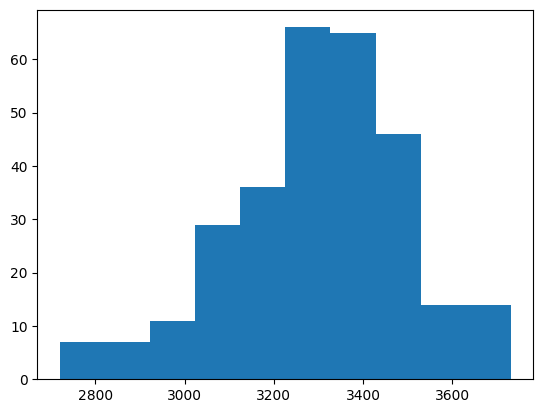

In [ ]:
import matplotlib.pyplot as plt

#Como crear un histograma

plt.hist(precios_amazon)
plt.show()

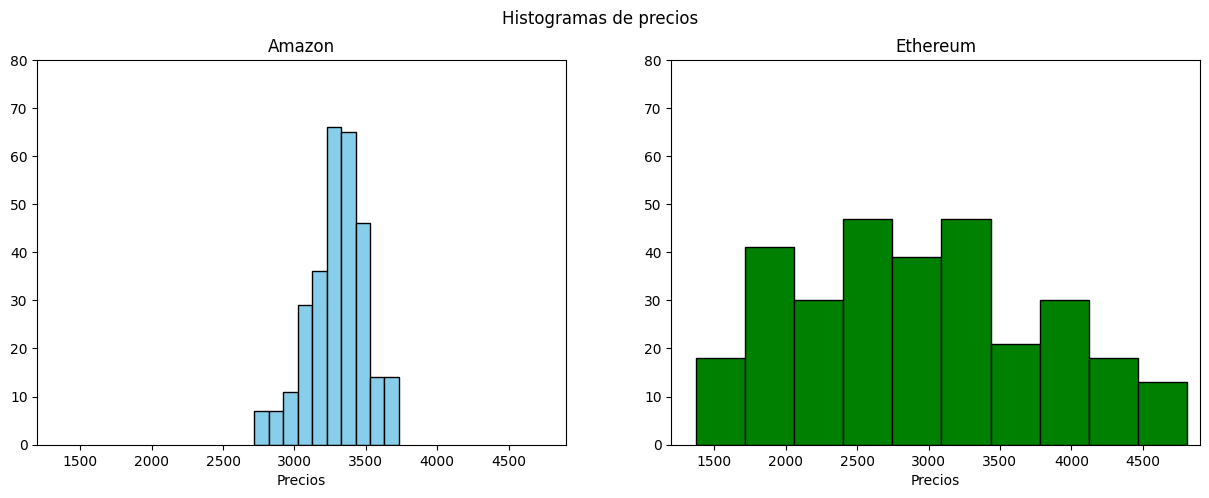

In [ ]:
#Crear histogramas
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5)) #ax1 y ax2 son los dos histogramas, nrows son los registros y ncols las columnas

fig.suptitle('Histogramas de precios')

ax1.hist(precios_amazon, color = 'skyblue', edgecolor = 'black')

# Establecer etiquetas de ejes y título
ax1.set_title('Amazon')
ax1.set_xlabel('Precios')

ax1.set_ylim([0,80])
ax1.set_xlim([1200, 4900])

ax2.hist(precios_ethereum, color = 'green', edgecolor = 'black')

ax2.set_title('Ethereum')
ax2.set_xlabel('Precios')

ax2.set_ylim([0,80])
ax2.set_xlim([1200, 4900])
plt.show() #Mostramos al figura


##Resumen de 5 números


In [ ]:
#Vamos a crear una función que calcule los 5 números

""" def crear_resumen_5_n (lista):

  #1° ordenamos la lista
  lista_ordenada = sorted(lista)

  #2° sacamos el máximo y mínimo
  maximo = max(lista)
  minimo = min(lista)

  #3° sacamos los cuartiles
  q2 = sacar_mediana(lista_ordenada, True)

  #Saco la cantidad de elementos
  cant_elementos = len(lista_ordenada)

  #Si es par
  if cant_elementos % 2 == 0:
    #Saco los dos números del medio
    primer_indice = (cant_elementos // 2) - 1
    segundo_indice = primer_indice + 1

    #Ahora sacamos las dos partes de la lista
    primer_parte_lista = lista_ordenada[:primer_indice + 1] #+1 para que el primer índice esté incluido
    segunda_parte_lista = lista_ordenada[segundo_indice:] #Acá si esta incluído

    #Ahora sacamos Q1 y Q3
    q1 = sacar_mediana(primer_parte_lista, True)
    q3 = sacar_mediana(segunda_parte_lista, True)

    return minimo, maximo, q1, q2, q3

  #Si es impar
  else:
    indice_mitad = cant_elementos // 2 #Me va a devolver la parte entera de la división, lo mismo que redondear hacia abajo
    primer_parte_lista = lista_ordenada[:indice_mitad]
    segunda_parte_lista = lista_ordenada[indice_mitad + 1:] #+1 porque necesitamos desde el que le sigue a la mitad hacia adelante

    #Ahora sacamos Q1 y Q3
    q1 = sacar_mediana(primer_parte_lista, True)
    q3 = sacar_mediana(segunda_parte_lista, True)

    return minimo, maximo, q1, q2, q3 """

    # Me di cuenta que da una pequeña diferencia con la función percentile de numpy, por esto decidí ajustar mi función

def crear_resumen_5_n(lista):
  import numpy as np
  # Calculamos el mínimo y máximo
  minimo = min(lista)
  maximo = max(lista)

  # Ordenamos la lista (solo si es necesario)
  lista_ordenada = sorted(lista)

 # Calculamos los cuartiles utilizando numpy.percentile()
  q1, q2, q3 = np.percentile(lista_ordenada, [25, 50, 75])

  return minimo, q1, q2, q3, maximo


In [ ]:
#Vamos a hacer el resumen de 5 números de AWS y ETH
#Usando mi propia función
minimo_eth, q1_eth, q2_eth, q3_eth, maximo_eth  = crear_resumen_5_n(precios_ethereum)
print(f"Cuartiles Ethereum con mi función: \n"
f"mínimo: {minimo_eth}, q1: {q1_eth}, q2: {q2_eth}, q3: {q3_eth}, máximo: {maximo_eth}")

minimo_amz, q1_amz, q2_amz, q3_amz, maximo_amz = crear_resumen_5_n(precios_amazon)

print(f"Cuartiles Amazon con mi función: \n"
f"mínimo: {minimo_amz}, q1: {q1_amz}, q2: {q2_amz}, q3: {q3_amz}, máximo: {maximo_amz}")

Cuartiles Ethereum con mi función: 
mínimo: 1369.04052734375, q1: 2264.2523803710938, q2: 2885.09033203125, q3: 3528.4259033203125, máximo: 4812.08740234375
Cuartiles Amazon con mi función: 
mínimo: 2720.290039, q1: 3192.494995, q2: 3312.530029, q3: 3430.170044, máximo: 3731.409912


In [ ]:
#Guardamos la información de los cuartiles en un DataFrame
datos = [[minimo_eth, q1_eth, q2_eth, q3_eth, maximo_eth],
         [minimo_amz, q1_amz, q2_amz, q3_amz, maximo_amz]]

# Creamos el DataFrame
df = pd.DataFrame(datos, index=['ETH', 'AMZ'], columns=['Mínimo', 'Q1', 'Mediana', 'Q3', 'Máximo'])
df

,Mínimo,Q1,Mediana,Q3,Máximo
ETH,1369.040527,2264.252380,2885.090332,3528.425903,4812.087402
AMZ,2720.290039,3192.494995,3312.530029,3430.170044,3731.409912


##Diagrama de Caja

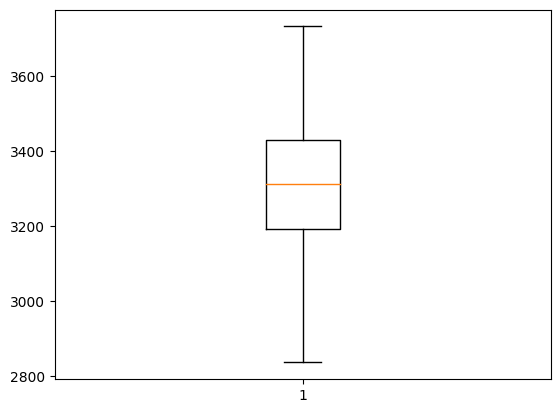

In [ ]:
plt.boxplot(precios_amazon, showfliers = False)#showfliers = False, no nos muesta los valores atípicos
plt.show()

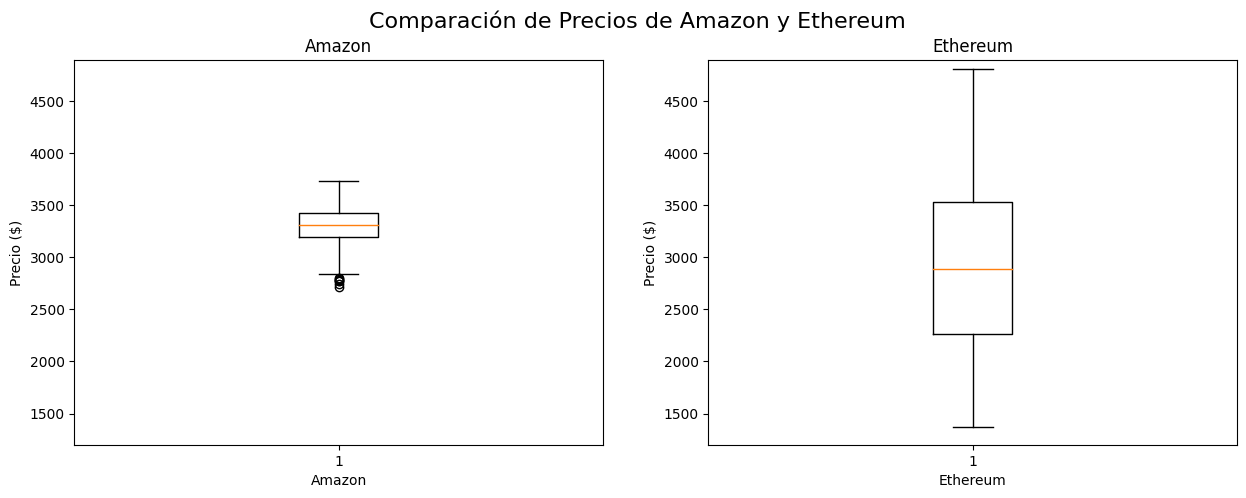

In [ ]:
#Crear fig y diagrama de caja
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

#Diagrama de caja Amazon
ax1.boxplot(precios_amazon)
ax1.set_title('Amazon')
ax1.set_ylabel('Precio ($)')
ax1.set_xlabel('Amazon')
ax1.set_ylim(1200,4900)

#Diagrama de caja Ethereum
ax2.boxplot(precios_ethereum)
ax2.set_title('Ethereum')
ax2.set_ylabel('Precio ($)')
ax2.set_xlabel('Ethereum')
ax2.set_ylim(1200,4900)

# Añadir etiquetas de ejes y título de la figura
fig.suptitle('Comparación de Precios de Amazon y Ethereum', fontsize=16)

plt.show()

##Valores Atípicos

In [ ]:
#Vamos a intentar crear una función para calcular los valores atípicos
def calcular_limites_valores_atipicos(min, q1, q2, q3, max):
  #Primero calculamos el IQR
  IQR = q3 - q1

  #Segundo calculamos los leves
  leve_inferior = q1 - (1.5 * IQR)
  leve_superior = q3 + (1.5 * IQR)

  #Tercero calculamos los extremos
  extremo_inferior = q1 - (3 * IQR)
  extremo_superior = q3 + (3 * IQR)

  return IQR, leve_inferior, leve_superior, extremo_inferior, extremo_superior

"""----------------------------------------------------------------------------------------------------------------------------------"""

#Ahora voy a crear una función que calcule el resumen de los 5 números y adicionalmente devuelva valores atípicos
def resumen_5_n_valores_atipicos(lista):
  #Llamamos a la función que nos devuelve el resumen de 5 números
  minimo, q1, q2, q3, maximo = crear_resumen_5_n(lista)
  #Llamamos a la función que nos devuelve los límites de los valores atípicos
  IQR, leve_inferior, leve_superior, extremo_inferior, extremo_superior = calcular_limites_valores_atipicos(minimo, q1, q2, q3, maximo)

  #Ahora calculamos los atípicos
  atipicos_inferiores_leves = []
  atipicos_superiores_leves = []
  atipicos_inferiores_extremos = []
  atipicos_superiores_extremos = []
  restantes = []

  for precio in lista:
    if precio < extremo_inferior:#Si son menos al extremo inferior
      atipicos_inferiores_extremos.append(precio)
    elif precio > extremo_superior:#Si son mayores al extremo superior
      atipicos_superiores_extremos.append(precio)
    elif precio < leve_inferior:#Si son menores al leve inferior
      atipicos_inferiores_leves.append(precio)
    elif precio > leve_superior:#Si son mayores al leve superior
      atipicos_superiores_leves.append(precio)
    #Si no forman parte de ninguno de los atipicos, revisamos sin no son parte de los 5
    elif precio != minimo and \
     precio != q1 and \
     precio != q2 and \
     precio != q3 and \
     precio != maximo:
     restantes.append(precio) #Entonces los guardamos como restantes

  #Ordenamos las listas
  atipicos_inferiores_leves.sort()
  atipicos_superiores_leves.sort()
  atipicos_inferiores_extremos.sort()
  atipicos_superiores_extremos.sort()
  restantes.sort()

  #Creamos una función para imprimir los valores
  def imprimir_valores():
    print(f"mínimo: {minimo} \n"
      f"q1: {q1} \n"
      f"q2: {q2} \n"
      f"q3: {q3} \n"
      f"máximo: {maximo} \n"
      f"IQR: {IQR} \n"
      f"Límite inferior para valores atípicos (leve): {leve_inferior} \n"
      f"Límite superior para valores atípicos (leve): {leve_superior} \n"
      f"Límite inferior para valores atípicos (extremo): {extremo_inferior} \n"
      f"Límite superior para valores atípicos (extremo): {extremo_superior} \n"
      f"Atípicos inferiores leves: {atipicos_inferiores_leves} \n"
      f"Atípicos superiores leves: {atipicos_superiores_leves} \n"
      f"Atípicos inferiores extremos: {atipicos_inferiores_extremos} \n"
      f"Atípicos superiores extremos: {atipicos_superiores_extremos} \n"
      f"Restantes: {restantes}")

  #Ahora cremos un diccionario final con todos los datos ya organizados
  datos_finales = {
    #Aca va el resumen de 5 números y los límites de valores atípicos
    "minimo": minimo,
    "q1": q1,
    "q2": q2,
    "q3": q3,
    "maximo": maximo,
    "IQR": IQR,
    "limite_leve_inferior": leve_inferior,
    "limite_leve_superior": leve_superior,
    "limite_extremo_inferior": extremo_inferior,
    "limite_extremo_superior": extremo_superior,
    #A partir de aca van las listas con valores atípicos y restantes
    "inferiores_leves": atipicos_inferiores_leves,
    "superiores_leves": atipicos_superiores_leves,
    "inferiores_extremos": atipicos_inferiores_extremos,
    "superiores_extremos": atipicos_superiores_extremos,
    "restantes" : restantes,
    "imprimir_valores": imprimir_valores
  }

  return datos_finales



In [ ]:
#Utilizamos la función propia creada con los precios de Amazon
datos_amazon = resumen_5_n_valores_atipicos(precios_amazon)
minimo = datos_amazon["minimo"]
q1 = datos_amazon["q1"]
q2 = datos_amazon["q2"]
q3 = datos_amazon["q3"]
maximo = datos_amazon["maximo"]
IQR = datos_amazon["IQR"]
leve_inferior = datos_amazon["limite_leve_inferior"]
leve_superior = datos_amazon["limite_leve_superior"]
extremo_inferior = datos_amazon["limite_extremo_inferior"]
extremo_superior = datos_amazon["limite_extremo_superior"]
atipicos_inferiores_leves = datos_amazon["inferiores_leves"]
atipicos_superiores_leves = datos_amazon["superiores_leves"]
atipicos_inferiores_extremos = datos_amazon["inferiores_extremos"]
atipicos_superiores_extremos = datos_amazon["superiores_extremos"]
restantes = datos_amazon["restantes"]

datos_amazon["imprimir_valores"]()


mínimo: 2720.290039 
q1: 3192.494995 
q2: 3312.530029 
q3: 3430.170044 
máximo: 3731.409912 
IQR: 237.67504899999994 
Límite inferior para valores atípicos (leve): 2835.9824215 
Límite superior para valores atípicos (leve): 3786.6826174999997 
Límite inferior para valores atípicos (extremo): 2479.469848 
Límite superior para valores atípicos (extremo): 4143.195191 
Atípicos inferiores leves: [2720.290039, 2749.060059, 2776.909912, 2777.449951, 2785.580078, 2792.75, 2799.719971] 
Atípicos superiores leves: [] 
Atípicos inferiores extremos: [] 
Atípicos superiores extremos: [] 
Restantes: [2837.060059, 2852.860107, 2879.560059, 2890.879883, 2896.540039, 2910.48999, 2912.820068, 2936.350098, 2947.330078, 2951.949951, 2957.969971, 2977.570068, 2991.469971, 3000.459961, 3003.949951, 3005.0, 3012.25, 3022.840088, 3023.870117, 3027.159912, 3027.98999, 3033.350098, 3041.050049, 3046.26001, 3052.030029, 3052.030029, 3055.290039, 3057.159912, 3057.639893, 3062.080078, 3062.850098, 3065.870117, 3

In [ ]:
#Ahora hacemos lo mismo con los valores de Ethereum
datos_ethereum = resumen_5_n_valores_atipicos(precios_ethereum)
minimo = datos_ethereum["minimo"]
q1 = datos_ethereum["q1"]
q2 = datos_ethereum["q2"]
q3 = datos_ethereum["q3"]
maximo = datos_ethereum["maximo"]
IQR = datos_ethereum["IQR"]
leve_inferior = datos_ethereum["limite_leve_inferior"]
leve_superior = datos_ethereum["limite_leve_superior"]
extremo_inferior = datos_ethereum["limite_extremo_inferior"]
extremo_superior = datos_ethereum["limite_extremo_superior"]
atipicos_inferiores_leves = datos_ethereum["inferiores_leves"]
atipicos_superiores_leves = datos_ethereum["superiores_leves"]
atipicos_inferiores_extremos = datos_ethereum["inferiores_extremos"]
atipicos_superiores_extremos = datos_ethereum["superiores_extremos"]
restantes = datos_ethereum["restantes"]

datos_ethereum["imprimir_valores"]()


mínimo: 1369.04052734375 
q1: 2264.2523803710938 
q2: 2885.09033203125 
q3: 3528.4259033203125 
máximo: 4812.08740234375 
IQR: 1264.1735229492188 
Límite inferior para valores atípicos (leve): 367.9920959472656 
Límite superior para valores atípicos (leve): 5424.686187744141 
Límite inferior para valores atípicos (extremo): -1528.2681884765625 
Límite superior para valores atípicos (extremo): 7320.946472167969 
Atípicos inferiores leves: [] 
Atípicos superiores leves: [] 
Atípicos inferiores extremos: [] 
Atípicos superiores extremos: [] 
Restantes: [1446.03369140625, 1475.7037353515625, 1492.6087646484375, 1515.1937255859375, 1533.2750244140625, 1541.914306640625, 1564.7076416015625, 1570.2039794921875, 1575.8531494140625, 1593.4134521484375, 1594.7626953125, 1595.3592529296875, 1626.57568359375, 1660.9095458984375, 1678.650146484375, 1691.333984375, 1702.842041015625, 1718.65087890625, 1744.243408203125, 1746.6168212890625, 1768.0350341796875, 1772.1024169921875, 1779.791015625, 1781

##Conclusiones


Luego de finalizar por completo el resumen de 5 números, nos damos cuenta que los datos de Amazon están mucho más centrados y menos dispersos, ya que si sacamos su rango y lo comparamos con el de Ethereum, el rango de Amazon es mucho más chico y el de Ethereum mucho más elevado, lo que esto significa que Ethereum tiene una mayor dispersión.

##Varianza

In [ ]:
#Crearemos una función para calcular la varianza y desviación estándar

def calcular_var_des(lista):
  #Primero sacamos la media
  media = calcular_media(lista)

  #Segundo a la cantidad de elementos le restamos 1
  n_menos_uno = len(lista) - 1

  #Tercero tenemos que calcular la diferencia entre cada elemento y la media; y luego elevar todos los elementos al cuadrado
  lista_al_cuadrado =  []

  for elemento in lista:
    lista_al_cuadrado.append(pow(elemento - media, 2))

  #Luego ya pasamos a sumar todos los elementos elevados al cuadrado y lo dividimos por la cantidad - 1
  suma_total = sum(lista_al_cuadrado)
  varianza = suma_total / n_menos_uno

  #Calculamos la desviación
  import math
  desviacion = math.sqrt(varianza)

  return varianza, desviacion

In [ ]:
#Ahora creamos otra con numpy, donde podemos indicar cuantos elementos le quitamos y devuelva también la desviación
def calcular_var_des_np(lista, elementos_a_quitar):
  import numpy as np
  varianza = np.var(lista, ddof = elementos_a_quitar)
  desviacion = np.sqrt(varianza)
  return varianza, desviacion

In [ ]:
varianza_amz, desviacion_amz = calcular_var_des(precios_amazon)
varianza_eth, desviacion_eth = calcular_var_des(precios_ethereum)

print(f"Amazon: Varianza :{varianza_amz}, Desviación: {desviacion_amz}")
print(f"Ethereum: Varianza :{varianza_eth}, Desviación: {desviacion_eth}")

Amazon: Varianza :38841.349197195996, Desviación: 197.08208745899765
Ethereum: Varianza :725203.0109649403, Desviación: 851.5885220955836


In [ ]:
#Ahora utilizamos la función de numpy
varianza_amz, desviacion_amz = calcular_var_des_np(precios_amazon, 1)
varianza_eth, desviacion_eth = calcular_var_des_np(precios_ethereum, 1)

print(f"Amazon: Varianza :{varianza_amz}, Desviación: {desviacion_amz}")
print(f"Ethereum: Varianza :{varianza_eth}, Desviación: {desviacion_eth}")

Amazon: Varianza :38841.349197195974, Desviación: 197.0820874589976
Ethereum: Varianza :725203.0109649407, Desviación: 851.5885220955838


In [ ]:
#Creamos el DataFrame

datos = [
    [varianza_amz, desviacion_amz],
    [varianza_eth, desviacion_eth]
]

df = pd.DataFrame(datos, index=['AMZ','ETH'], columns=['Varianza','Desviación Estandar']).round(2)
df

,Varianza,Desviación Estandar
AMZ,38841.35,197.08
ETH,725203.01,851.59


In [ ]:
#Ahora usamos describe de pd que nos devuelve el resumen de 5 números y la desviación estándar
df_amz = pd.DataFrame(precios_amazon)
df_eth = pd.DataFrame(precios_ethereum)

print(df_amz.describe())
print(df_eth.describe())

                 0
count   295.000000
mean   3299.830896
std     197.082087
min    2720.290039
25%    3192.494995
50%    3312.530029
75%    3430.170044
max    3731.409912
                 0
count   304.000000
mean   2927.195598
std     851.588522
min    1369.040527
25%    2264.252380
50%    2885.090332
75%    3528.425903
max    4812.087402
